# 🍷 Predicting the quality of vine using machine learning

### In this notebook we are going to find the quality of vine using machine learning . To train our machine learning model we are going to use the dataset from kaggle .

##### Dataset has 12 Columns
       1 - fixed acidity
       2 - volatile acidity
       3 - citric acid
       4 - residual sugar
       5 - chlorides
       6 - free sulfur dioxide
       7 - total sulfur dioxide
       8 - density
       9 - pH
       10 - sulphates
       11 - alcohol
       
       Output variable (based on sensory data): 
       12 - quality (score between 0 and 10)
       
### In the output variable we are looking for a score between 0 to 10 means we are predicting the score

To predict the output variable we are going to use different classification algorithms.
In classification we try to find a decision boundary between the dataset to divide the dataset in different categories..



In [24]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import seaborn as sns

np.random.seed(42)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve


In [25]:
## Loading data
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## EDA

In [26]:
## CHeck the shape of dataframe
df.shape

(1599, 12)

In [27]:
## check the datatypes of columns in the dataframe
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Here we can see only our outcome columns(quality) has integer values , every column has float dtype  

In [28]:
## Get a info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
## CHeck for any null values in the dataframe
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see that we don't have any null values in the dataframe , 

In our dataframe we don't have any categorical data and also there is no null values so we don't need to do any kind of data preprocessing to the dataframe except feature scalling of dataframe

Let's visulize the dataframe

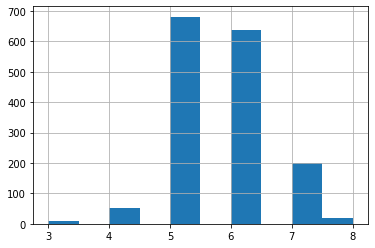

In [30]:
## Let's visulize the quality column
df["quality"].hist()

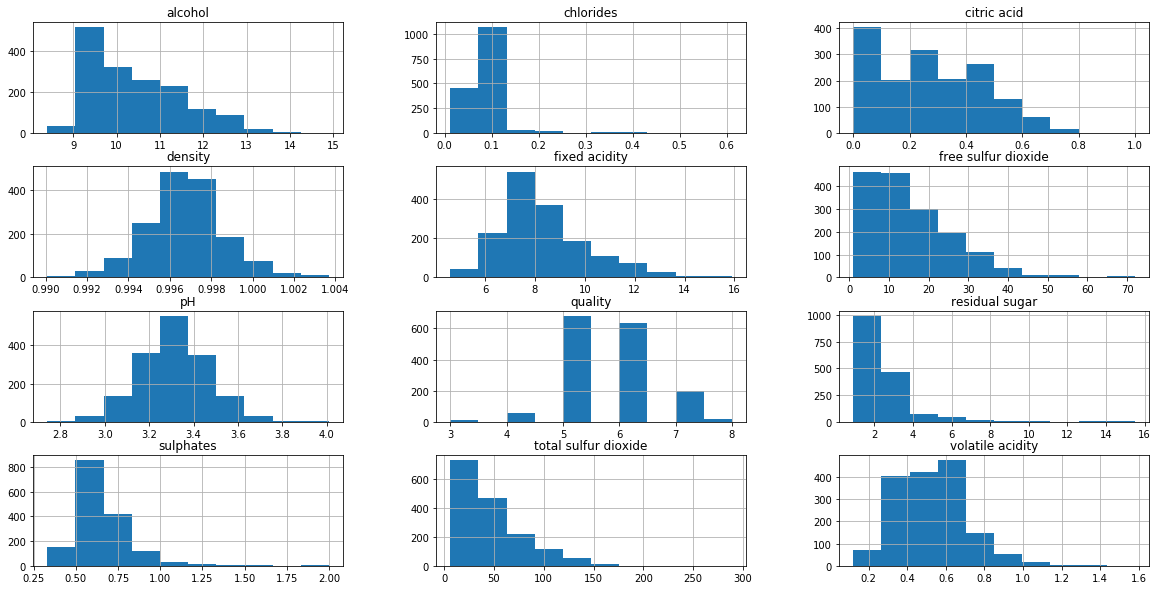

In [31]:
df.hist(figsize=(20,10));

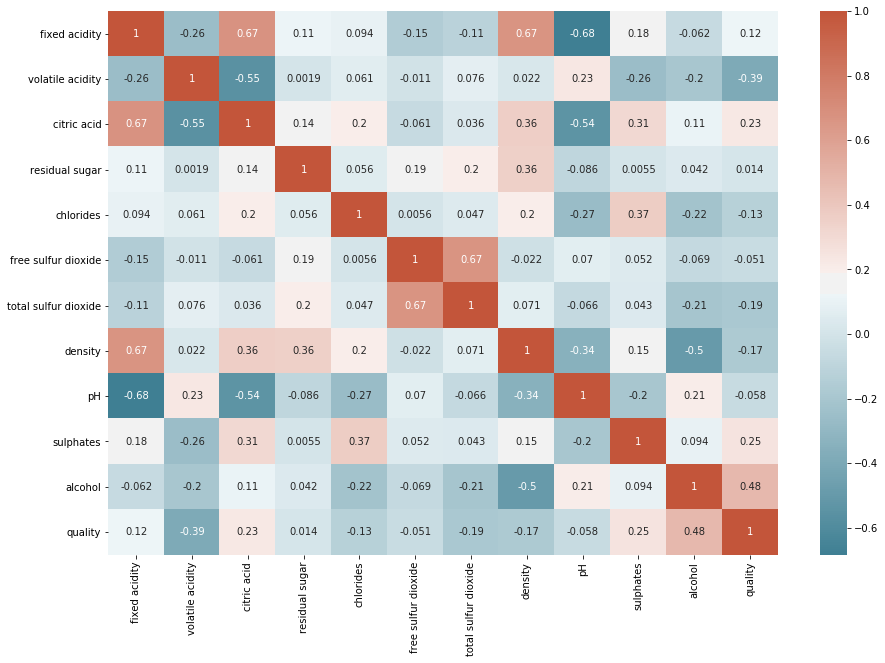

In [32]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [33]:
## Normalize the dataframe into -1 to 1 range
X = df.iloc[:,:-1].values

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

df.quality = [1 if x >= 5 else 0 for x in df['quality']]
y = df.quality

In [34]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [35]:
y.unique()

array([1, 0], dtype=int64)

In [36]:
## Modeling

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
X_train

array([[ 0.21852997,  0.90601191,  0.20039205, ...,  1.09426457,
         0.48302886,  1.10483337],
       [-1.27524919, -1.77549685,  0.66254621, ..., -0.39596939,
        -0.40216729,  1.38643512],
       [ 1.48249695, -0.76993107,  1.02199944, ..., -0.07200549,
         0.54204194, -0.58477711],
       ...,
       [-0.6432657 ,  0.51495855, -1.08336951, ...,  1.28864292,
        -0.69723268, -0.86637886],
       [-0.24109439, -1.83136161,  0.4057939 , ...,  0.05758008,
         0.83710732,  1.38643512],
       [-1.44760832, -1.32857872, -0.05636026, ...,  0.51112954,
        -0.69723268,  2.8883111 ]])

In [37]:
y_train

493     1
354     1
342     1
834     1
705     1
       ..
1130    1
1294    1
860     1
1459    1
1126    1
Name: quality, Length: 1279, dtype: int64

In [38]:
 # Filtering df for only good quality
df_temp = df[df['quality']==1]
df_temp.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.0
mean,8.338021,0.519766,0.274967,2.532812,0.087128,16.031250,46.960938,0.996749,3.308118,0.660853,10.431478,1.0
std,1.742808,0.171017,0.193294,1.395909,0.045554,10.486054,33.048411,0.001896,0.152798,0.166414,1.070688,0.0
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.370000,8.400000,1.0
25%,7.100000,0.390000,0.100000,1.900000,0.070000,8.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.0
50%,7.900000,0.510000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996755,3.310000,0.620000,10.200000,1.0
75%,9.300000,0.630000,0.430000,2.600000,0.090000,22.000000,63.000000,0.997853,3.400000,0.730000,11.100000,1.0
max,15.900000,1.330000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.900000,1.0


In [39]:
 # Filtering df for only good quality
df_temp = df[df['quality']==0]
df_temp.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,0.0
std,1.649284,0.247970,0.207406,1.723735,0.075121,9.076508,26.395123,0.001667,0.175100,0.224323,0.918178,0.0
min,4.600000,0.230000,0.000000,1.200000,0.045000,3.000000,7.000000,0.993400,2.740000,0.330000,8.400000,0.0
25%,6.800000,0.565000,0.020000,1.900000,0.068500,5.000000,13.500000,0.995655,3.300000,0.495000,9.600000,0.0
50%,7.500000,0.680000,0.080000,2.100000,0.080000,9.000000,26.000000,0.996600,3.380000,0.560000,10.000000,0.0
75%,8.400000,0.882500,0.270000,2.950000,0.094500,15.500000,48.000000,0.997700,3.500000,0.600000,11.000000,0.0
max,12.500000,1.580000,1.000000,12.900000,0.610000,41.000000,119.000000,1.001000,3.900000,2.000000,13.100000,0.0


## Decision Tree Classifier

In [40]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(dtc_pred)
print(dtc.score(X_test,y_test))
print(classification_report(y_test, dtc_pred))
print(confusion_matrix(y_test,dtc_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
0.9375
              precision    recall  f1-score   support

           0       0.09      0.09      0.09        11
           1       0.97      0.97      0.97       309

    accuracy                           0.94       320
   macro avg       0.53      0.53      0.53       320
weighted avg       0.94      0.94      0.94       320

[[  1  10]
 [ 10

## Random Forest Classifier


In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(rfc_pred)
print(rfc.score(X_test,y_test))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.97      1.00      0.98       309

    accuracy                           0.96       320
   macro avg       0.48      0.50      0.49       320
weighted avg       0.93      0.96      0.95       320

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.9625
[[  0  11]
 [  1

In [42]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))
print(y_pred3)
print(model3.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.97      0.99      0.98       309

    accuracy                           0.95       320
   macro avg       0.48      0.49      0.49       320
weighted avg       0.93      0.95      0.94       320

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.953125
[[  0  11]
 [ 

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

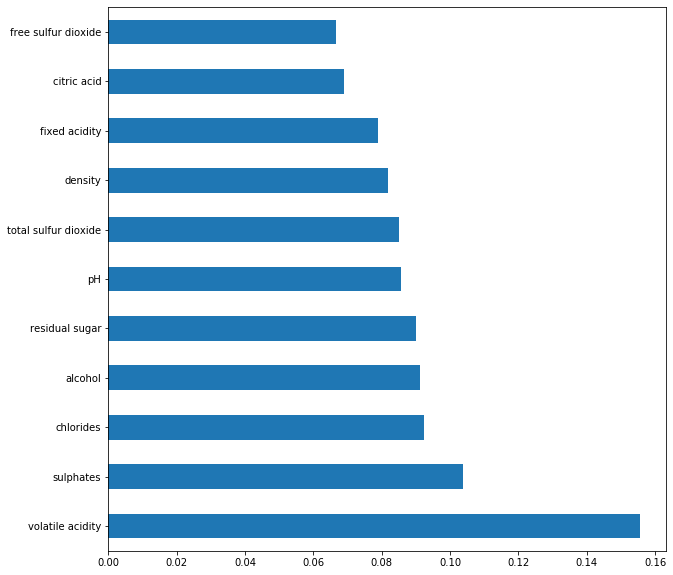

In [43]:
X_features = df.drop('quality', axis = 1)
feat_importances = pd.Series(rfc.feature_importances_,index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
plt.title

In [44]:
## Predicting for new data
X_test

array([[-0.35600048,  0.17976995, -0.98066858, ..., -0.46076217,
         0.01092425, -0.77251161],
       [-0.29854743, -0.15541864, -0.51851442, ...,  0.51112954,
        -1.05131114, -0.86637886],
       [ 1.36759086,  0.79428237, -0.26176211, ..., -0.20159105,
         1.89934271, -0.49090986],
       ...,
       [-0.01128221,  0.40322901, -0.10771073, ..., -1.0438972 ,
        -0.75624575, -0.58477711],
       [ 0.27598301, -1.44030825,  0.61119574, ..., -1.0438972 ,
         0.18796348,  0.72936437],
       [ 0.44834214,  1.32499765, -1.18607043, ..., -0.13679827,
        -0.69723268, -0.67864436]])

In [54]:
type(X_test),X_test[0]

(numpy.ndarray,
 array([-0.35600048,  0.17976995, -0.98066858, -0.02753165,  0.56393475,
        -0.17930021, -0.01422508,  0.18726488, -0.46076217,  0.01092425,
        -0.77251161]))

In [51]:
X_test.shape,X_test.ndim

((320, 11), 2)

In [75]:
new_data = [[10.8,0.88,0.00,9.6,0.098,25.0,67.0,0.9968,8.20,0.68,9.8]]
new_data_array = np.array(new_data)
new_data_array = StandardScaler().fit_transform(new_data_array)
if rfc.predict(new_data_array) == 1:
    print("Quality of Vine Is Good")
else :
    print("Quality of Vine is not Good")

Quality of Vine Is Good
